In [2]:
# XOR Operation using tensorflow.keras (1 hidden layer)

import tensorflow as tf
import numpy as np
x = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

from tensorflow.keras import layers
model = tf.keras.Sequential() # Sequential Model
model.add(layers.Dense(3, activation='sigmoid', input_dim=2)) # Output(H): 3 | Activation Function: Sigmoid | Input(X): 2
model.add(layers.Dense(1, activation='sigmoid'))# Output(Y): 1 | Activation Function: Sigmoid | (Input(H): 3)
sgd = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent | Learning Rate: Lambda = 0.1
model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy']) # Loss Function (Cost Function) : Binary Cross Entropy

model.fit(x, y, epochs=10000, batch_size=4, verbose=1) # 10000 epochs 4 batch -> 40000 updates

000
Epoch 9805/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9806/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9807/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9808/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9809/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9810/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9811/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9812/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9813/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9814/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.

In [3]:
model.evaluate(x, y)
predicted = model.predict(x)
print(predicted)

1/1 [==============================] - 0s 402ms/step - loss: 0.0132 - accuracy: 1.0000
[[0.01271769]
 [0.98754215]
 [0.98773026]
 [0.01515111]]


In [ ]:
# XOR Operation using sigmoid function with 6 hidden layers.
import tensorflow as tf
import numpy as np
x = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

from tensorflow.keras import layers

actFunc = 'sigmoid' # 학습이 안된다.
model = tf.keras.Sequential()
model.add(layers.Dense(10, activation=actFunc, input_dim=2))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(1, activation='sigmoid'))
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x, y, epochs=10000, batch_size=2, verbose=1)
model.evaluate(x, y)

predicted = model.predict(x)
predicted

# Gradient Vanishingn Problem
* is encountered when training artificial neural networks with gradient-based learning methods and backpropagation.

In those methods (Gradient Descent Methos and backpropagation), each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training.

The problem is that in some cases, **the gradient will be vanishingly small**, **effectively preventing the weight from changing its value**.

In the process of backpropagation, weight will be updated by partial derivative of sigmoid function. If the absolute value of $WX+B$, the input of sigmoid is too big, then its slope gets close to '0' and weight gets updated no longer. 

![VanishingGradient.png](VanishingGradient.png)

**Improved activation function model required! (See below link)**

[excelsior-cjh.tistory.com](https://excelsior-cjh.tistory.com/177)

# ReLU Function (Rectified Linear Unit)
$$ReLU(x)=max(0,x)$$

ReLU Function bypasses positives and set negatives as zero.

Since its slope is simply '0' or '1', the process of backpropagation gets a way easier. (less consuming resources)

Dead ReLU Problem: ReLU returns 0 once sum of the weight goes to negative because its gradient is also 0. (this node is dead then.)

# LeakyReLU Function
$$LeakyReLU_{\alpha}(x)=max(\alpha x,x), \quad \alpha \approx 0.01$$

By implementing hyper-parameter $\alpha$ (normally about 0.01),'Dead ReLU' is solved.

# ELU Function (Exponential Linear Unit)
$$
ELU_{\alpha} =
\begin{cases} 
    \alpha e^x -1 & \quad(x<0)\\
    x & \quad (x \geq 0)
\end{cases}
$$

* When $x<0$, ELU return mean gets close to 0 so that bias shift decreases and Vanishing Gradeint problem decreases.
* Even if $x<0$, gradient is non-zero so that dead neuron is not made.
* Hyper parameter $\alpha$ determines convergence value when x is negative.
* When $\alpha=1$, ELU has a continuous slope (differentiable) at $x=0$ and in range $(-\infty,\infty)$ therefore rate of convergence in GDM is faster.

---

Generally, activation functions are used more in order of ELU, LeakyReLU, tanh, sigmoid. cs231n recommends ReLU first, then ReLu Family(LeakyReLU or ELU) and avoid sigmoid.

[cs231n.stanford.edu](http://cs231n.stanford.edu/)

---

Keep in mind that output layer must returns value between 0 and 1 for one-hot encoded categories or binary. **Use sigmoid for output layer if needed**

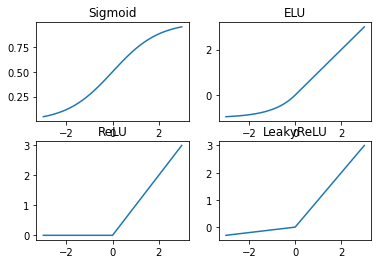

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def Sigmoid(x):
    return (1/(1+np.exp(-x)))

def ReLU(x) : 
    return np.maximum(0, x)

def LeakyReLU(x,alpha) : 
    return np.maximum(alpha*x, x)

def ELU(x,alpha) : 
    return (x>0)*x + (x<=0)*(alpha*(np.exp(x)-1))

domain = np.linspace(-3,3,600)

plt.subplot(221)
plt.title('Sigmoid')
plt.plot(domain,Sigmoid(domain))
plt.subplot(222)
plt.title('ELU')
plt.plot(domain,ELU(domain,1))
plt.subplot(223)
plt.title('ReLU')
plt.plot(domain,ReLU(domain))
plt.subplot(224)
plt.title('LeakyReLU')
plt.plot(domain,LeakyReLU(domain,0.1))
plt.show()

In [2]:
import tensorflow as tf
import numpy as np
x = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

from tensorflow.keras import layers

actFunc = 'relu'
model = tf.keras.Sequential()
model.add(layers.Dense(10, activation=actFunc, input_dim=2))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(10, activation=actFunc))
model.add(layers.Dense(1, activation='sigmoid')) # output layer uses sigmoid function in order to be in range (0,1)
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

2021-07-18 22:58:08.566073: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-18 22:58:08.566341: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-07-18 22:58:12.231164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-18 22:58:12.231234: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-18 22:58:12.231271: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fennecfox38-13UD580-GX30K): /proc/driver/nvidia/version does not exist
2021-07-18 22:58:12.231831: I tensorflow/core/platf

In [3]:
model.fit(x, y, epochs=10000, batch_size=2, verbose=1)
model.evaluate(x, y)

predicted = model.predict(x)
predicted

 [==============================] - 0s 6ms/step - loss: 4.1242e-06 - accuracy: 1.0000
Epoch 9814/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1235e-06 - accuracy: 1.0000
Epoch 9815/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1230e-06 - accuracy: 1.0000
Epoch 9816/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1225e-06 - accuracy: 1.0000
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1220e-06 - accuracy: 1.0000
Epoch 9818/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1215e-06 - accuracy: 1.0000
Epoch 9819/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1209e-06 - accuracy: 1.0000
Epoch 9820/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1204e-06 - accuracy: 1.0000
Epoch 9821/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1201e-06 - accuracy: 1.0000
Epoch 9822/10000
2/2 [==============================] - 0s 8ms/ste

array([[1.30610215e-05],
       [9.99998987e-01],
       [9.99998748e-01],
       [7.25432017e-07]], dtype=float32)

# Optimization

(cf. [cs231n.github.io/neural-networks-2](https://cs231n.github.io/neural-networks-2))

## Xavier Initialization & He Initialization

Initial value might affect the result or rate of convergence if it is not convex enough. The concept of 'Xavier Initialization' is lower varience below specific level.

Note that $n_{in}$ is the number of node in previous layer, and $n_{out}$ is the number of node in next layer.

Xavier Initialization [[Understanding the difficulty of training deep feedforward neural networks by Glorot et al.,2010]](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf):
$$W \sim N(0, Var(W))$$
$$Var(W)=\frac{2}{n_{in}+n_{out}}$$

```W = np.random.randn(fan_in,fan_out)/np.sqrt(fan_in)```

in keras:
```model.add(layers.Dense(fan_out, activation='sigmoid', input_dim=fan_in, kernel_initializer='GlorotNormal'))```

Xavier Initialization in ReLU Model might kill half of its node. To compensate those dead nodes, set variance 0.5 times in following He Initialization.

He Initialization [[Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification by He et al.,2015]](https://arxiv.org/abs/1502.01852):
$$W \sim N(0, Var(W))$$
$$Var(W)=\frac{2}{n_{in}}$$

```W = np.random.randn(fan_in,fan_out)/np.sqrt(fan_in/2)```

in keras:
```model.add(layers.Dense(fan_out, activation='relu', input_dim=fan_in, kernel_initializer='he_normal'))```



## Drop out:
![dropout.jpeg](dropout.jpeg)

[[Dropout paper by Srivastava et al.,2014](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)]

While training, dropout is implemented by only keeping a neuron active with some probability $p$ (a hyperparameter), or setting it to zero otherwise.

in keras (30%):
```model.add(layers.Dropout(0.3))```

## Batch Normalization

* Distribution on each mini-batch keeps changing.
* In order to learn changed distribuition, model deviates a little from correct direction.
* **Batch Normalization** prevents the mean of weights on each batch from being biased toward + or -, so that backpropagate weights smoothly.
* **Batch Normalization** is the concept of normalizing the output of the middle layer so that the next layer learns normalized output from the previous layer.

$$BN(x_i) = \gamma \cdot \frac{x_i - \mu_B}{\sqrt{{\sigma_B}^2 + \epsilon}}$$

in keras: ```model.add(tf.keras.layers.BatchNormalization())```

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Coveriance Shift](https://arxiv.org/abs/1502.03167)

## Momentum

* is the concept of giving momentum to weight when updating so that the previous gradient effects to next gradient.
* GDM is normally expressed as: $W:=W-\lambda \frac{\partial Cost(W)}{\partial W}$
* Momentum method works as: $$W:=W-m, \quad m:=\beta m + \lambda \frac{\partial Cost(W)}{\partial W}$$
* $m$: moment
* $\beta$: proportion of moment reflected to updates

in keras: ```tensorflow.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)```

## Nesterov Momentum
* is variation of momentum method.
* is known as performing better than the existing momentum method.

![NesterovMomentum.png](NesterovMomentum.png)

$$W:=W-m, \quad m:=\beta m + \lambda \frac{\partial Cost(W-\beta m)}{\partial W}$$

in keras: ```tensorflow.keras.optimizer.SGD(learning_rate=0.01,momentum=0.9, nesterov=True)```

## AdaGrad
* is the method that change the weight of a variable with **gradual slope more than a steep slope**.
* is not preferred for deep learning model because it tends to terminate too early.


$$G_t = G_{t-1} + (\nabla_{\theta} J(\theta_t))^2$$

<br>

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t+\epsilon}} \cdot \nabla_{\theta} J(\theta_t)$$


* $G_t$ contains square sum of change in each variable at time t.
* When updating weight, put change in denominator so that large changes are adjusted to be small.

![AdaGrad.png](AdaGrad.png)

in keras: ```tensorflow.keras.optimizers.Adagrad( learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07 )```

## RMSProp
* is suggested by prof. Hinton to complement shortcoming of AdaGrad.
* does not accumulate the square sum of change, but calculates exponential mean.
* reflect the recent change significantly, making them more accurate in the time series.


$$G := \gamma G + (1-\gamma) (\nabla_{\theta} J(\theta_t))^2$$

<br>

$$\theta := \theta - \frac{\eta}{\sqrt{G+\epsilon}} \cdot \nabla_{\theta} J(\theta_t)$$


in keras:
```python
tensorflow.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9, # Discounting factor for the history/coming gradient. Defaults to 0.9.
    momentum=0.0,
    epsilon=1e-07, # A small constant for numerical stability
    centered=False, # If True, gradients are normalized by the estimated variance of the gradient; if False, by the uncentered second moment.
)
```

## Adam Optimizer
* is concept of combination of momentum and RMSProp.
* is most widely used.

in keras:
```python
tensorflow.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9, # the exponential decay rate for the 1st moment extimates.
    beta_2=0.999, # the exponential decay rate for the 2nd moment extimates.
    epsilon=1e-07,
    amsgrad=False,
)
```

In [31]:
# load MNIST Datasets
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(-1,784) 
test_x = test_x.reshape(-1,784)
train_x = train_x / 255
test_x = test_x / 255
train_y_onehot = to_categorical(train_y)
test_y_onehot = to_categorical(test_y)

train_x.shape,train_y_onehot[0]

((60000, 784), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [32]:
# Add hidden layer (using relu and softmax)
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=784))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

2021-07-19 12:45:30.263276: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-19 12:45:30.263939: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-19 12:45:30.264455: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fennecfox38-13UD580-GX30K): /proc/driver/nvidia/version does not exist
2021-07-19 12:45:30.266644: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-19 12:45:31.615999: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1

In [33]:
# Use Adam Optimizer instead of sgd
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=784))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

2021-07-19 12:46:29.431325: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
Epoch 1/5
600/600 [==============================] - 6s 9ms/step - loss: 0.2412 - accuracy: 0.9297
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.0896 - accuracy: 0.9728
Epoch 3/5
600/600 [==============================] - 6s 9ms/step - loss: 0.0592 - accuracy: 0.9815
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.0439 - accuracy: 0.9860
Epoch 5/5
600/600 [==============================] - 5s 8ms/step - loss: 0.0337 - accuracy: 0.9893


In [34]:
# Use Adam Optimizer with He initializer
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=784, kernel_initializer='he_normal'))
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(layers.Dense(10, activation='softmax', kernel_initializer='he_normal'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

2021-07-19 12:47:04.332385: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2378 - accuracy: 0.9304
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.0923 - accuracy: 0.9720
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.0599 - accuracy: 0.9808
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0433 - accuracy: 0.9865
Epoch 5/5
600/600 [==============================] - 4s 7ms/step - loss: 0.0312 - accuracy: 0.9905


In [35]:
# Adam Optimizer + He initializer + droupout
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal', input_dim=784))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=10)

2021-07-19 12:48:24.557358: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
Epoch 1/10
600/600 [==============================] - 7s 9ms/step - loss: 0.3330 - accuracy: 0.8984
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1517 - accuracy: 0.9544
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1108 - accuracy: 0.9660
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0918 - accuracy: 0.9721
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0797 - accuracy: 0.9746
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0707 - accuracy: 0.9776
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0628 - accuracy: 0.9798
Epoch 8/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0560 - accuracy: 0.9812
Epoch 9/10
600/600 [==============================] - 4s 7m

In [38]:
model.evaluate(test_x,test_y_onehot)
model.save("mnist_test.h5") # saving model
!ls

313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9805
dropout.jpeg	  mnist_test.h5        NeuronCell.png	 VanishingGradient.png
HiddenLayer1.png  NeuralModel.png      or_and_xor.png
HiddenLayer2.png  NeuralNetwork.ipynb  Tensorflow.ipynb


In [41]:
# reload saved model
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(-1,784) 
test_x = test_x.reshape(-1,784)
train_x = train_x / 255
test_x = test_x / 255
train_y_onehot = to_categorical(train_y)
test_y_onehot = to_categorical(test_y)
train_y_onehot[0]

model = tf.keras.models.load_model('mnist_test.h5')
model.evaluate(test_x, test_y_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9805


[0.06793633103370667, 0.9804999828338623]